Q.  Build the linear regression model using scikit learn in boston data to predict
    'Price' based on other dependent variable.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [72]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [73]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [74]:
bos['Target'] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [76]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [77]:
bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [78]:
for col in bos.columns:
    print("colun Name: ",col, "\n")
    print(pd.Categorical(bos[col]),"\n\n")
    

colun Name:  CRIM 

[0.00632, 0.02731, 0.02729, 0.03237, 0.06905, ..., 0.06263, 0.04527, 0.06076, 0.10959, 0.04741]
Length: 506
Categories (504, float64): [0.00632, 0.00906, 0.01096, 0.01301, ..., 51.1358, 67.9208, 73.5341, 88.9762] 


colun Name:  ZN 

[18.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]
Length: 506
Categories (26, float64): [0.0, 12.5, 17.5, 18.0, ..., 85.0, 90.0, 95.0, 100.0] 


colun Name:  INDUS 

[2.31, 7.07, 7.07, 2.18, 2.18, ..., 11.93, 11.93, 11.93, 11.93, 11.93]
Length: 506
Categories (76, float64): [0.46, 0.74, 1.21, 1.22, ..., 19.58, 21.89, 25.65, 27.74] 


colun Name:  CHAS 

[0.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]
Length: 506
Categories (2, float64): [0.0, 1.0] 


colun Name:  NOX 

[0.538, 0.469, 0.469, 0.458, 0.458, ..., 0.573, 0.573, 0.573, 0.573, 0.573]
Length: 506
Categories (81, float64): [0.385, 0.389, 0.392, 0.394, ..., 0.718, 0.740, 0.770, 0.871] 


colun Name:  RM 

[6.575, 6.421, 7.185, 6.998, 7.147, ..., 6.593, 6.120, 6.976

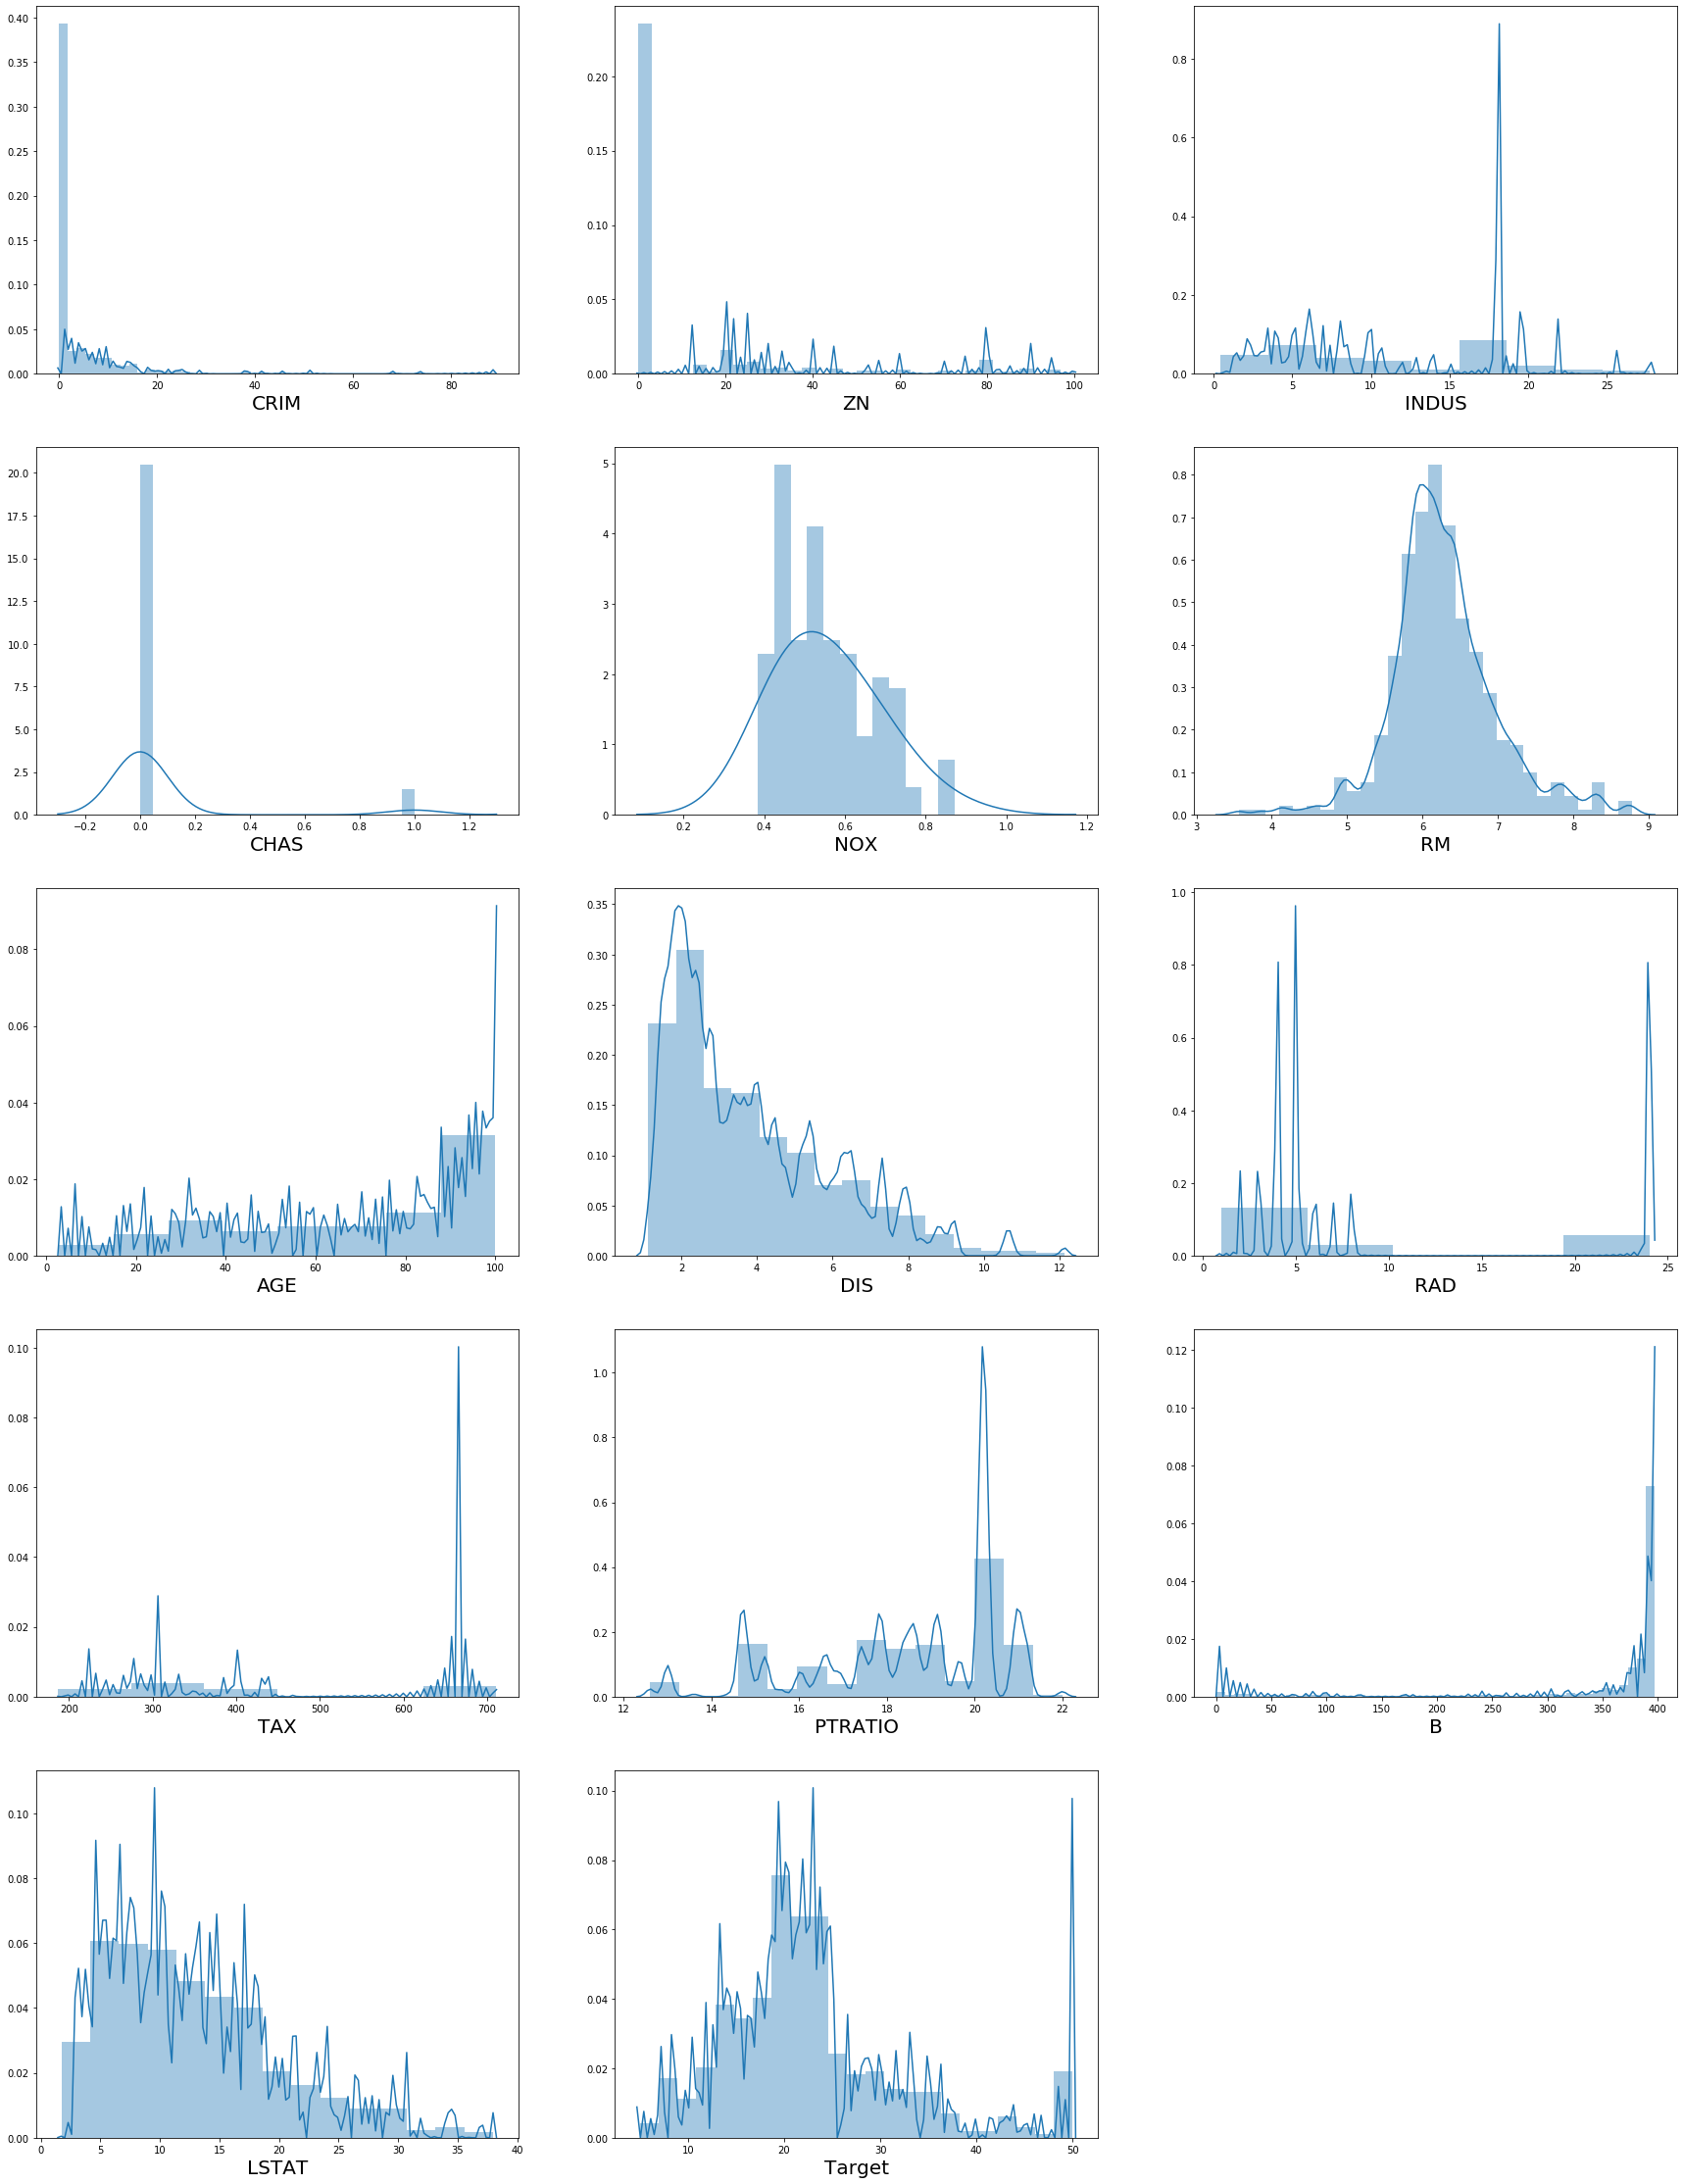

In [79]:
plt.figure(figsize=(30,40), facecolor='white')

plotnumber = 1

for column in bos:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(bos[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

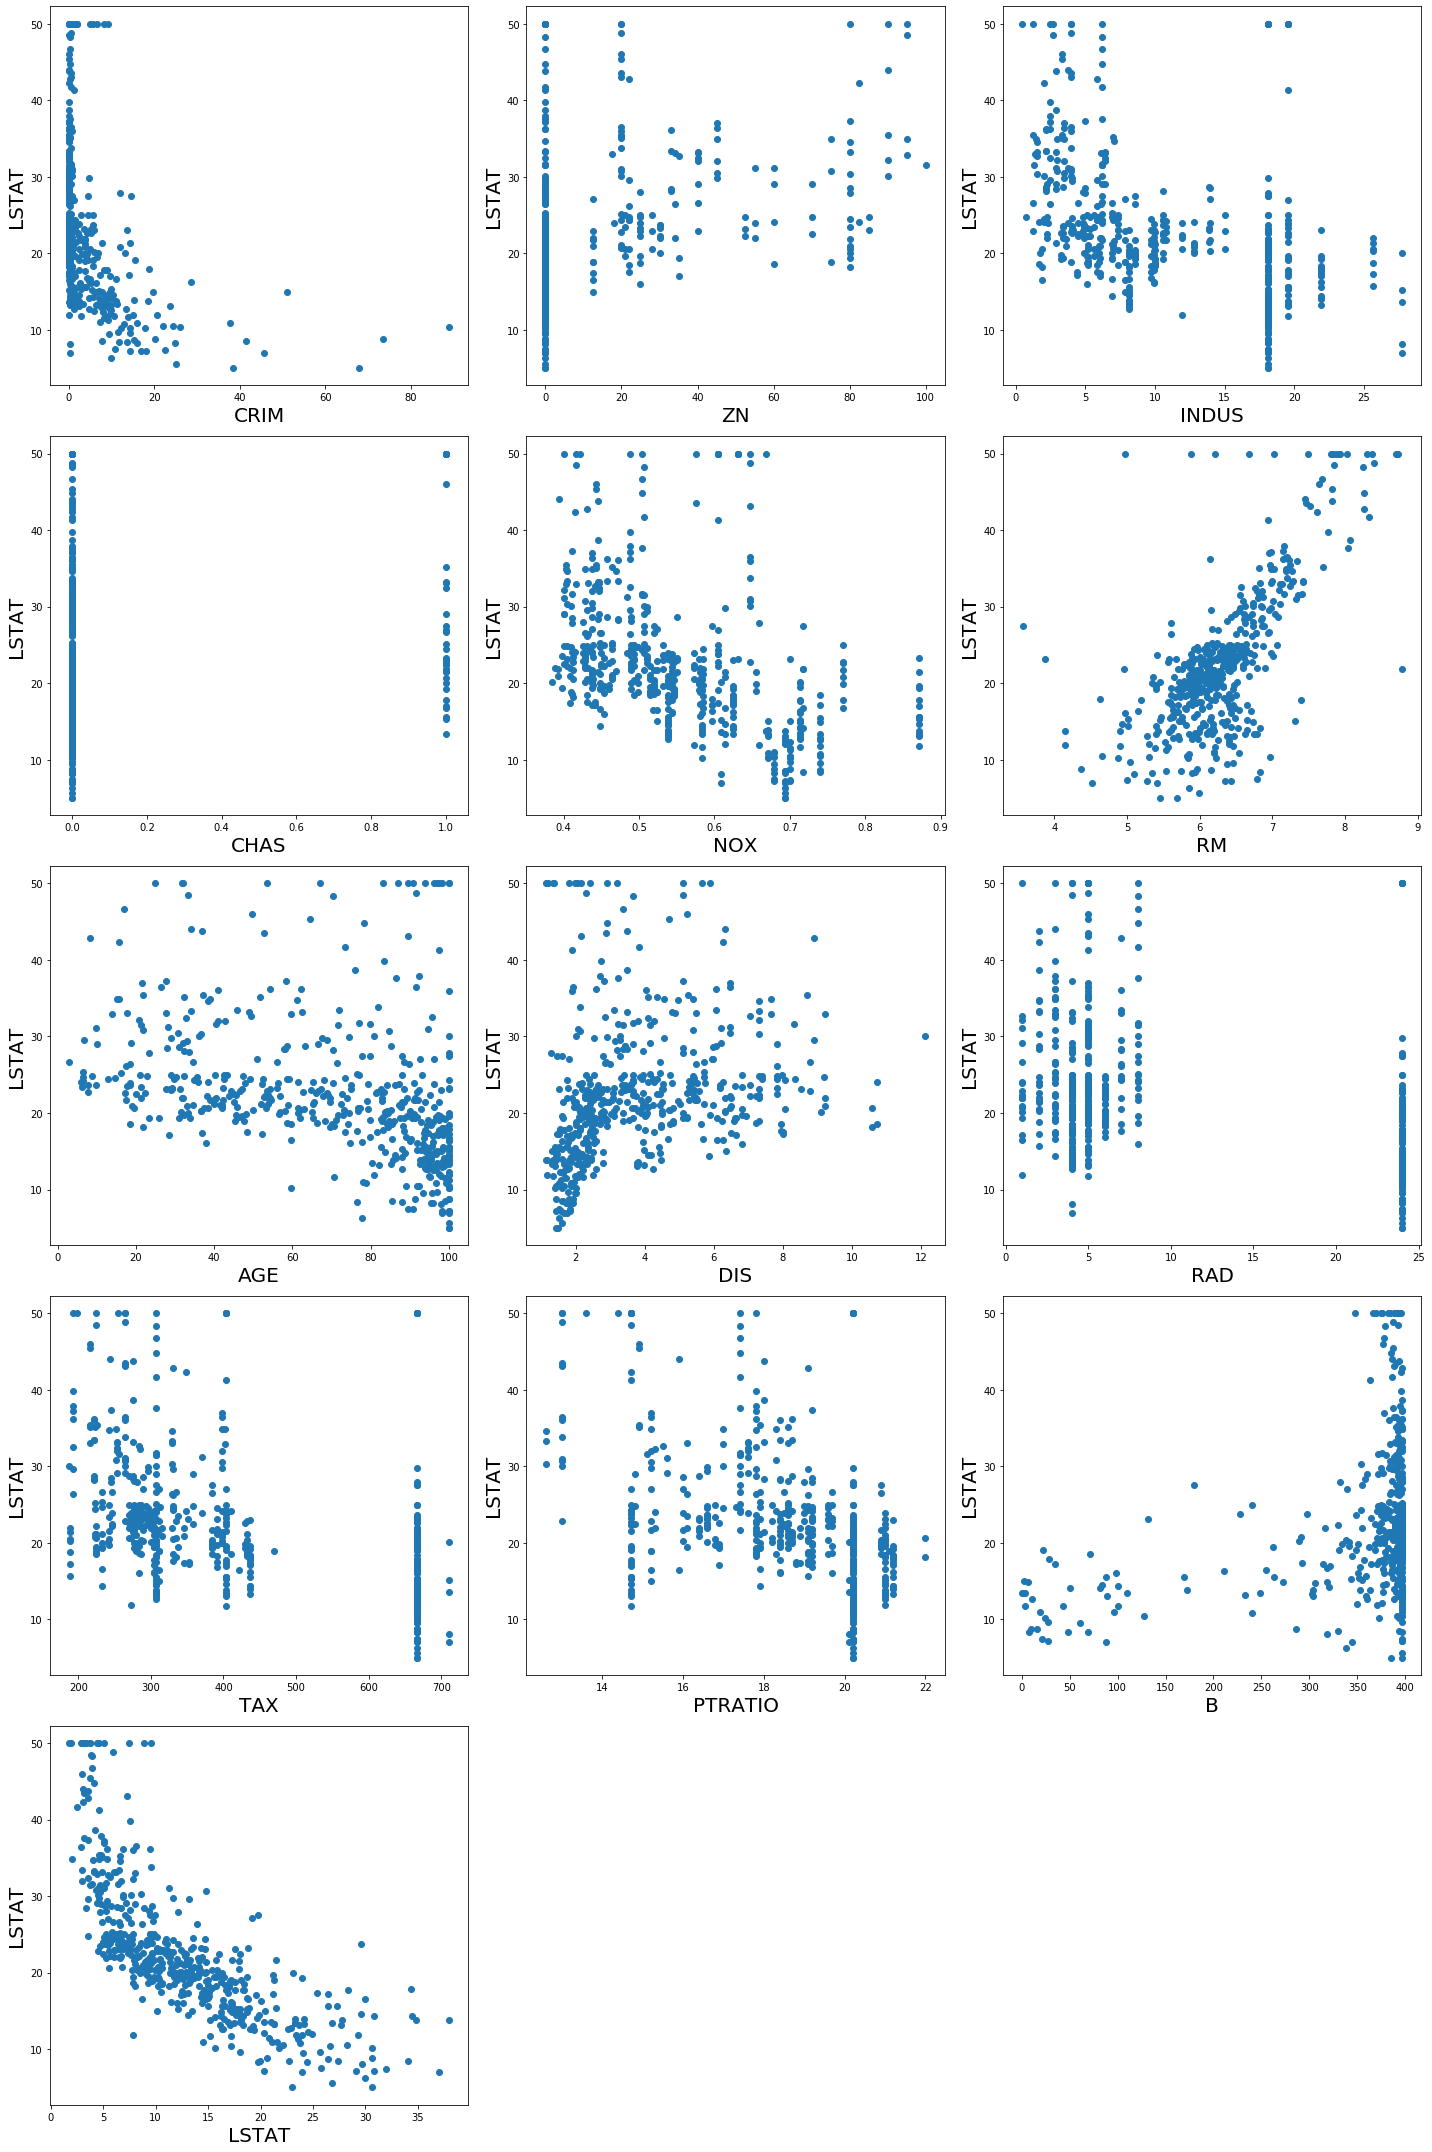

In [80]:
Y = bos['Target']
X = bos.drop(columns=['Target'])
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column], Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('LSTAT',fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
    

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

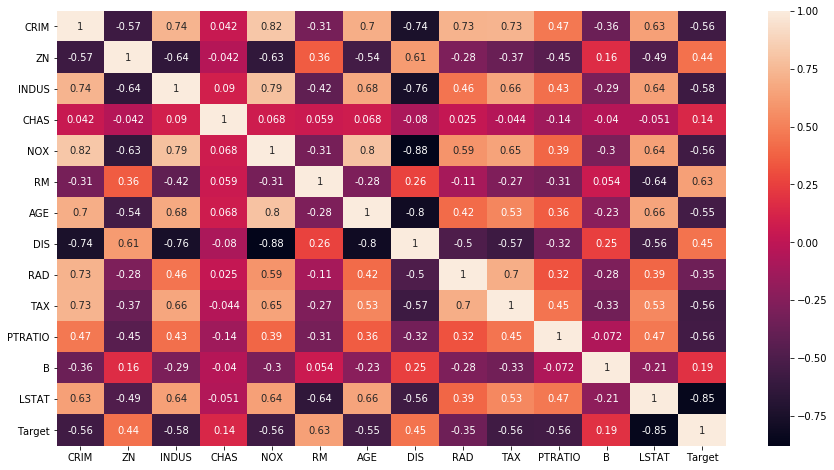

In [81]:

# Check the multicollinearity factor

corr = bos.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
bos.columns

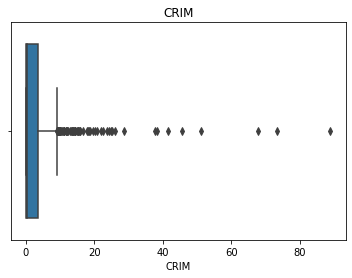

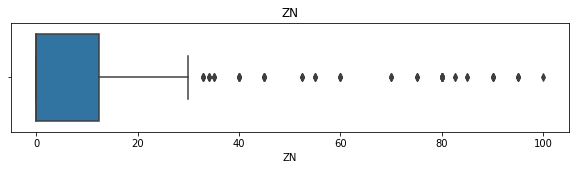

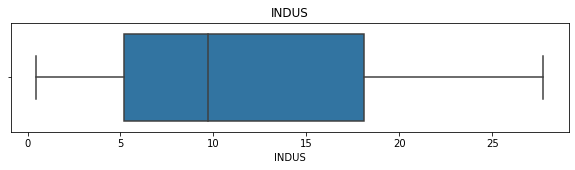

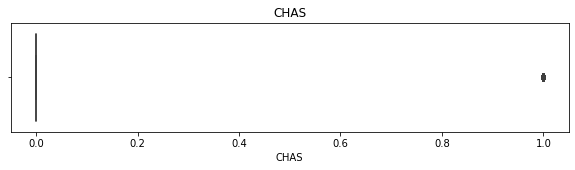

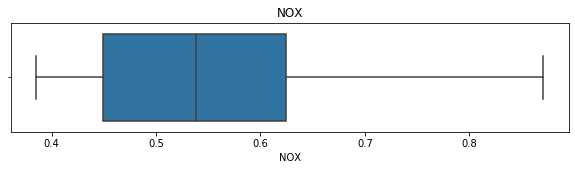

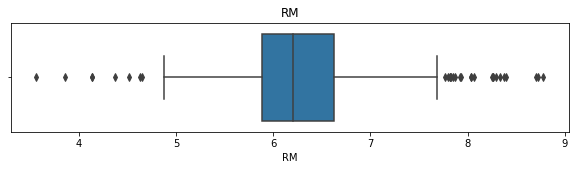

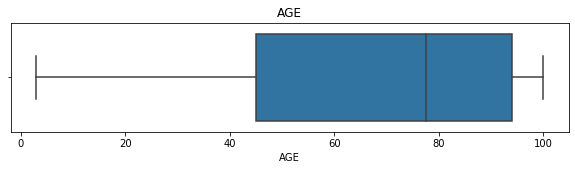

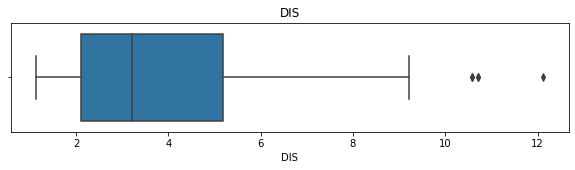

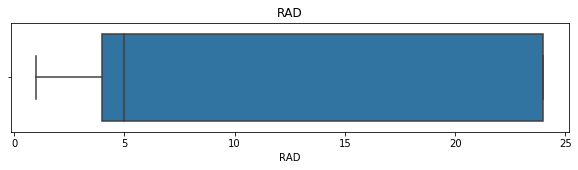

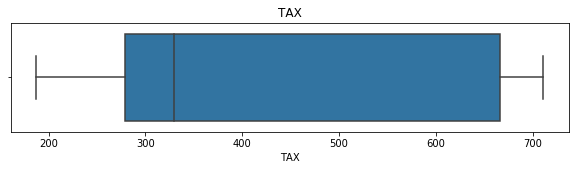

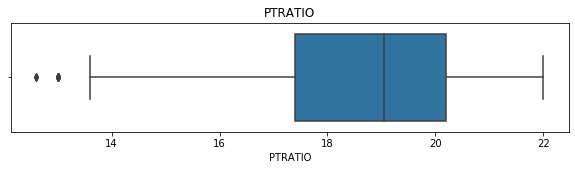

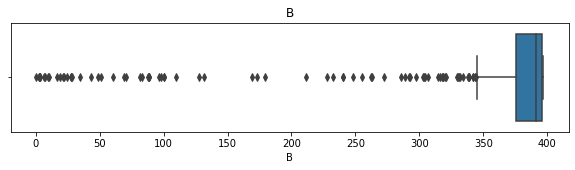

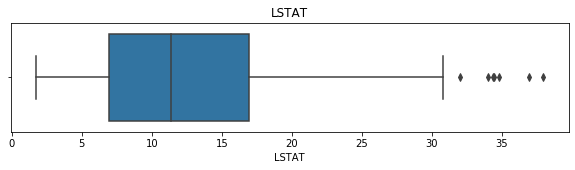

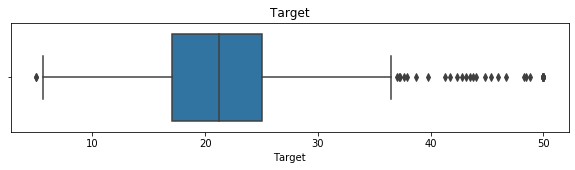

<Figure size 720x144 with 0 Axes>

In [82]:

for column in bos:
    df = bos.copy()
    sns.boxplot(bos[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

In [83]:
# Handle the outliers

# CRIM columns

IQR = bos['CRIM'].quantile(0.75) - bos['CRIM'].quantile(0.25)
lower = bos['CRIM'].quantile(0.25) - (IQR * 1.5)
upper = bos['CRIM'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


bos.loc[df['CRIM']>=upper, 'CRIM']=upper
# bos.loc[df['CRIM']<=lower, 'CRIM']=lower

IQR: 3.5950375,  lower: -5.31051125,  upper: 9.06963875


In [84]:
# ZN columns

IQR = bos['ZN'].quantile(0.75) - bos['ZN'].quantile(0.25)
lower = bos['ZN'].quantile(0.25) - (IQR * 1.5)
upper = bos['ZN'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


bos.loc[df['ZN']>=upper, 'ZN']=upper
# bos.loc[df['ZN']<=lower, 'ZN']=lower

IQR: 12.5,  lower: -18.75,  upper: 31.25


In [85]:
# RM columns

IQR = bos['RM'].quantile(0.75) - bos['RM'].quantile(0.25)
lower = bos['RM'].quantile(0.25) - (IQR * 1.5)
upper = bos['RM'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


bos.loc[df['RM']>=upper, 'RM']=upper
bos.loc[df['RM']<=lower, 'RM']=lower

IQR: 0.7379999999999995,  lower: 4.778500000000001,  upper: 7.730499999999999


In [86]:
# B columns

IQR = bos['B'].quantile(0.75) - bos['B'].quantile(0.25)
lower = bos['B'].quantile(0.25) - (IQR * 1.5)
upper = bos['B'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


# bos.loc[df['B']>=upper, 'B']=upper
bos.loc[df['B']<=lower, 'B']=lower

IQR: 20.847500000000025,  lower: 344.10624999999993,  upper: 427.49625000000003


In [87]:
# LSTAT columns

IQR = bos['LSTAT'].quantile(0.75) - bos['LSTAT'].quantile(0.25)
lower = bos['LSTAT'].quantile(0.25) - (IQR * 1.5)
upper = bos['LSTAT'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


bos.loc[df['LSTAT']>=upper, 'LSTAT']=upper
# bos.loc[df['LSTAT']<=lower, 'LSTAT']=lower

IQR: 10.005000000000003,  lower: -8.057500000000005,  upper: 31.962500000000006


In [88]:
# Target columns

IQR = bos['Target'].quantile(0.75) - bos['Target'].quantile(0.25)
lower = bos['Target'].quantile(0.25) - (IQR * 1.5)
upper = bos['Target'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


bos.loc[df['Target']>=upper, 'Target']=upper
bos.loc[df['Target']<=lower, 'Target']=lower

IQR: 7.975000000000001,  lower: 5.0624999999999964,  upper: 36.962500000000006


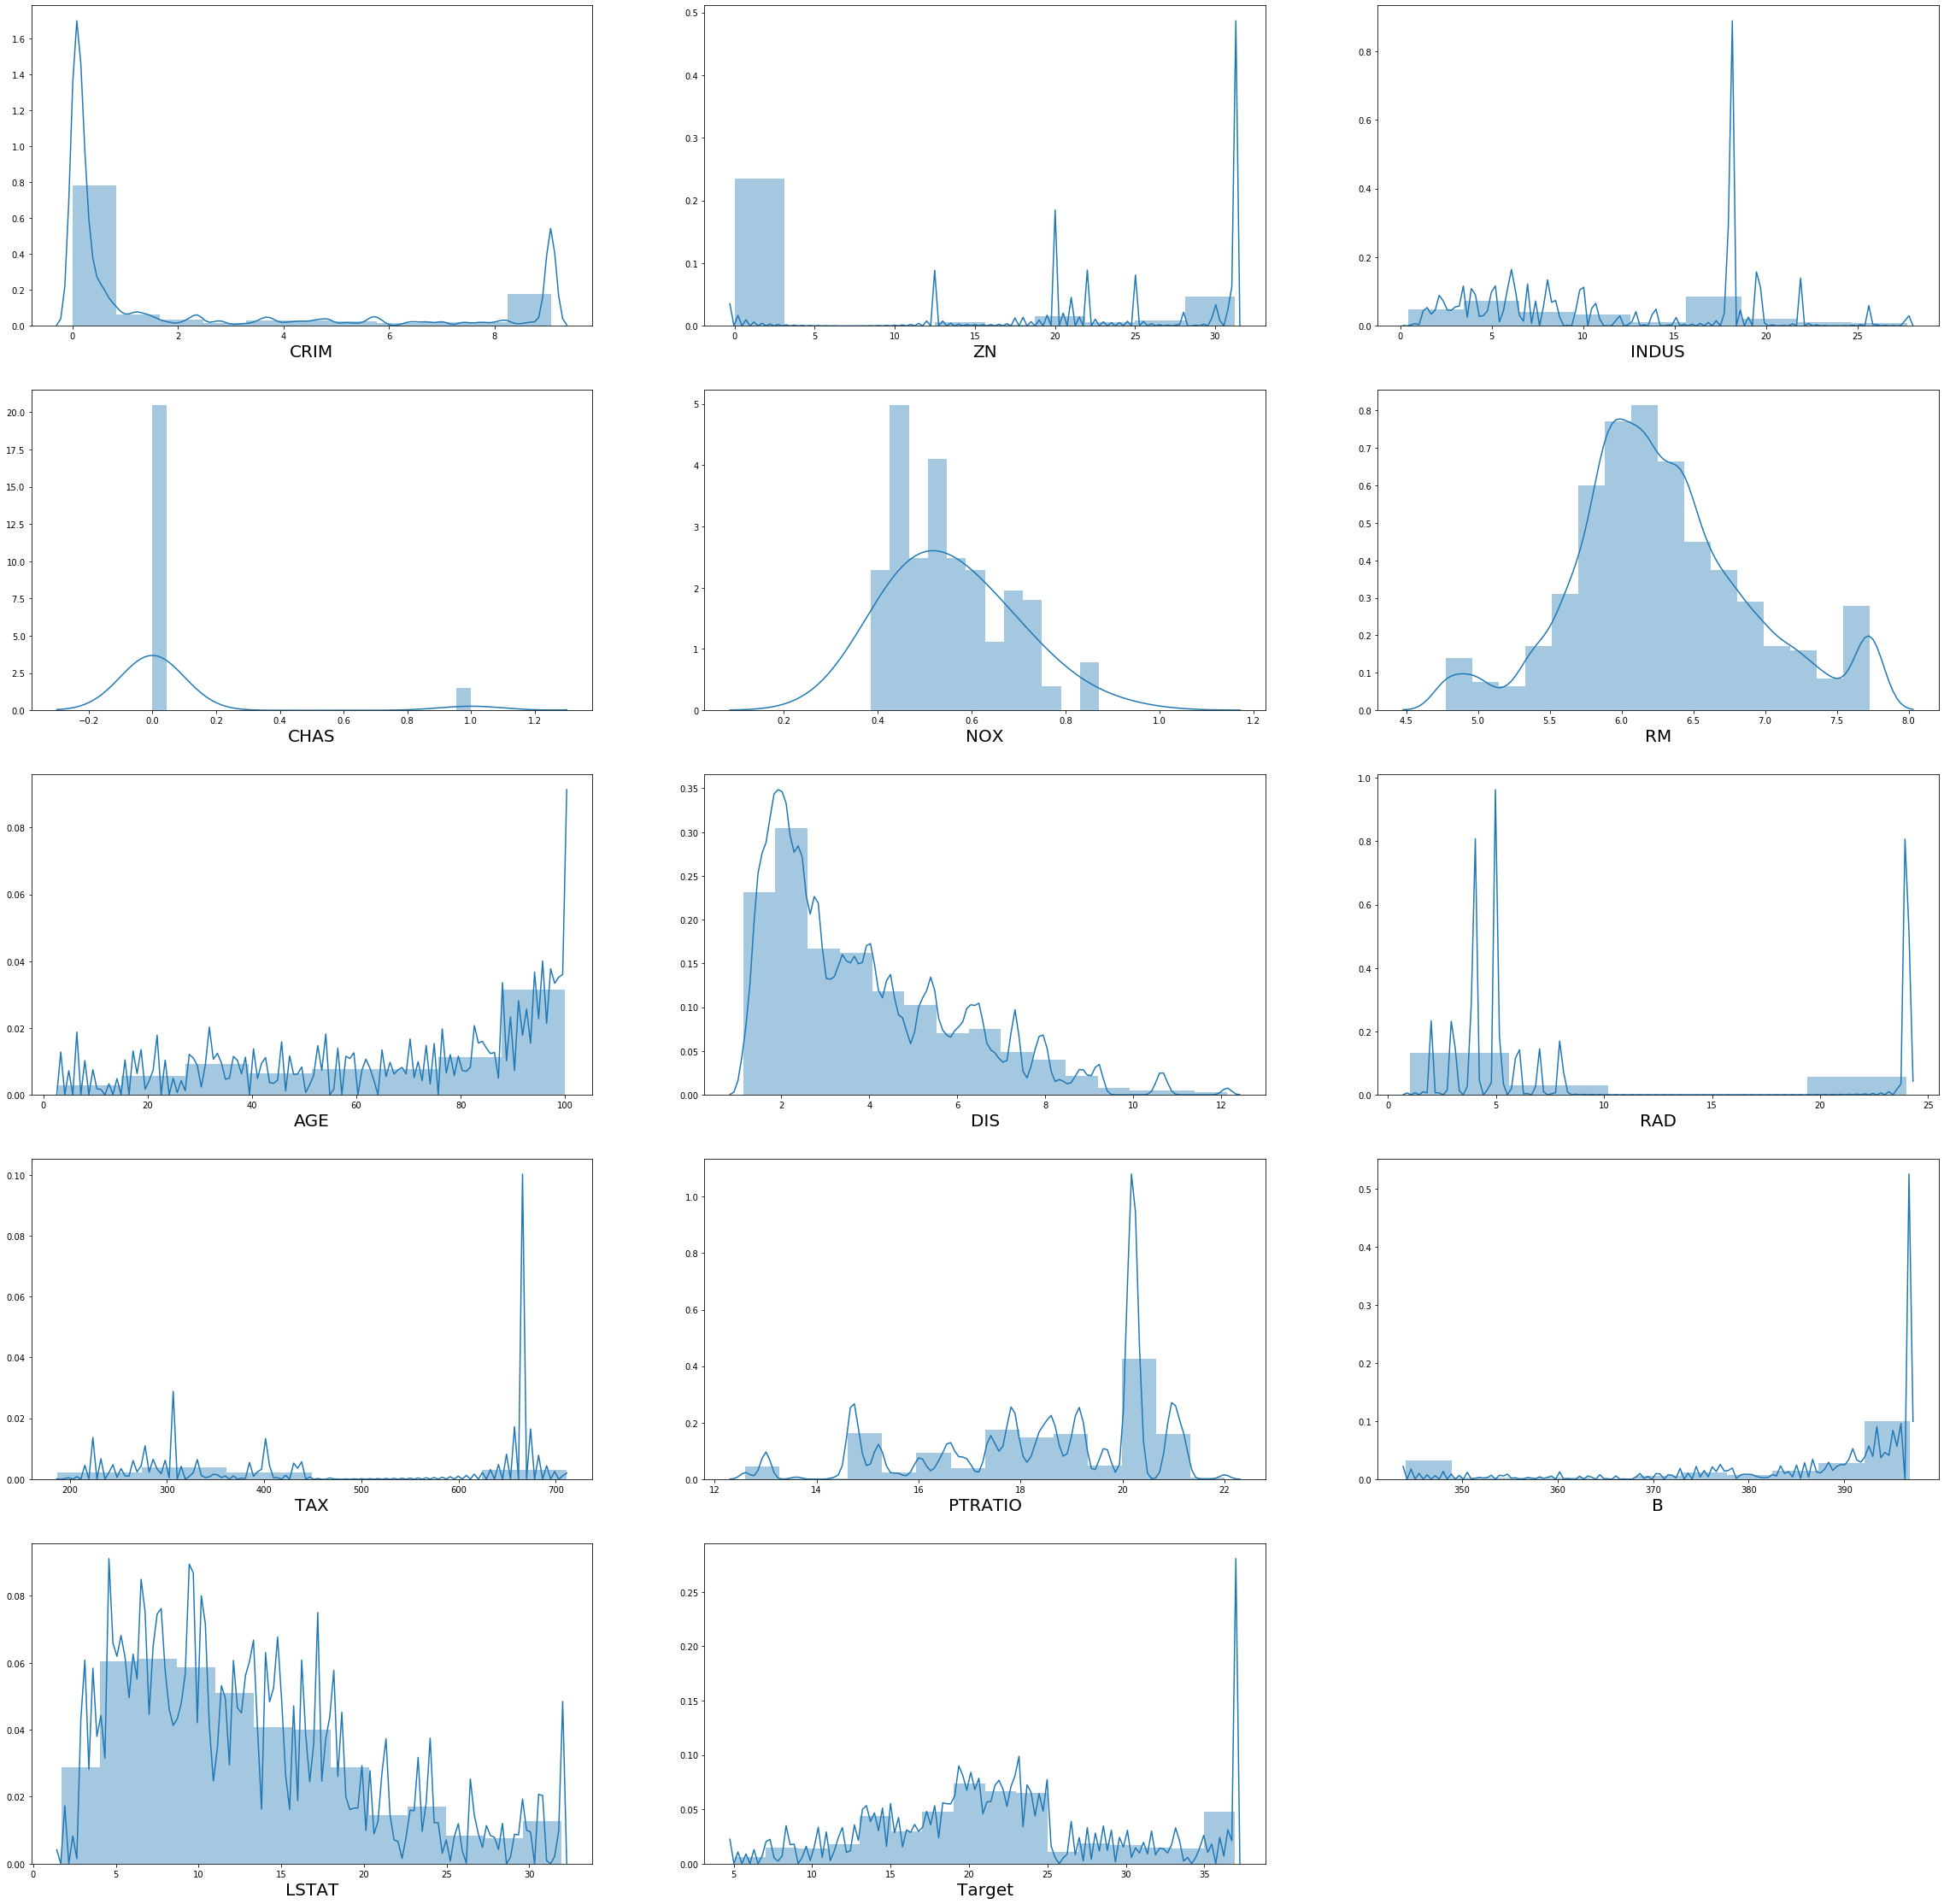

In [89]:
plt.figure(figsize=(40,40), facecolor='white')

plotnumber = 1

for column in bos:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(bos[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [90]:
Y = bos['Target']
X = bos.drop(columns=['Target'])

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

In [92]:
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Check the R_Square value based on test data

y_predict2 = linear.predict(X_test)
r2 = r2_score(Y_test, y_predict2)
r2

0.7943124769256673

In [94]:
# Check the R_Square value based on train data

y_predict = linear.predict(X_train)
r2 = r2_score(Y_train, y_predict)
r2

0.7836174791374448

In [95]:
# Doing Some features Transformation:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [96]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
# Check the R_Square value based on test data

y_predict1 = linear_model.predict(X_test_scaled)
r2 = r2_score(Y_test, y_predict1)
r2

0.795158078335844

In [98]:
# Check the R_Square value based on train data

y_predict1 = linear_model.predict(X_train_scaled)
r2 = r2_score(Y_train, y_predict1)
r2

0.7836174791374448

In [99]:
linear_model.predict(scaler.transform([[0.037680, 31.25, 1.52, 0.0, 0.404, 7.2740, 38.3, 7.3090, 
                       2.0, 329.0, 12.6, 392.20000, 6.62]]))

array([32.08793415])

In [100]:
filename = 'LinearModel.pickle'
pickle.dump(linear_model, open(filename, 'wb'))

In [101]:
loaded_model = pickle.load(open(filename, 'rb'))
pred = loaded_model.predict(scaler.transform([[0.037680, 31.25, 1.52, 0.0, 0.404, 7.2740, 38.3, 
                                               7.3090, 2.0, 329.0, 12.6, 392.20000, 6.62]]))
pred

array([32.08793415])